In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pytrends.request import TrendReq
from pprint import pprint
import string
import praw
import datetime

# Import API key
from config import reddit_id
from config import reddit_secret
from config import username
from config import password


In [19]:
# Import Reddit credentials
reddit = praw.Reddit(client_id=reddit_id,
                     client_secret=reddit_secret,
                     password=password,
                     user_agent=f"script by u/{username}",
                     username=username)
print(reddit.user.me())
# Initialize count and lists for DataFrame
count=0
timestamps=[]
timestamps_conv=[]
submission_title=[]
likes=[]


for submission in reddit.subreddit('news').search('IS', sort='new', time_filter='year', limit=300):
   count+=1
   print(count)
   timestamps.append(submission.created)
   print(submission.created)
   value = datetime.datetime.fromtimestamp(submission.created)
   timestamps_conv.append(value)
   print(value)
   submission_title.append(submission.title)
   print(submission.title)
   likes.append(submission.ups)
   print(submission.ups)

Admer2019
1
1536887747.0
2018-09-13 18:15:47
M&M's is introducing three new peanut-based flavors: Toffee, jalapeño and coconut
69
2
1536835962.0
2018-09-13 03:52:42
While Hurricane Florence is busy in the Atlantic, Supertyphoon Mangkhut is also preparing to hammer the West Pacific.
120
3
1536785037.0
2018-09-12 13:43:57
Tesla workers speak out: 'Anything pro-union is shut down really fast'
41631
4
1536781576.0
2018-09-12 12:46:16
Jimmy Buffett Is Getting Into the Weed Business With Billionaire Wrigley Gum Heir
433
5
1536734847.0
2018-09-11 23:47:27
Trump says government is 'absolutely, totally prepared' for Hurricane Florence
248
6
1536689679.0
2018-09-11 11:14:39
Russia is main suspect in mystery attacks on U.S. diplomats in Cuba
4759
7
1536663283.0
2018-09-11 03:54:43
'I asked him not to go anywhere that evening': One murder on 9/11 is still unsolved in New York City
80
8
1536547590.0
2018-09-09 19:46:30
Woman, 28, charged with attempted murder after man is stabbed
33
9
1536544162.0


101
1533291511.0
2018-08-03 03:18:31
Missionary who admits to sexually abusing boys in Haiti is sentenced
80
102
1533285244.0
2018-08-03 01:34:04
Soldier trying to help woman in accident is hit by 2nd car
29
103
1533280813.0
2018-08-03 00:20:13
Amazon Removes Products Featuring Nazi Symbols
240
104
1533270562.0
2018-08-02 21:29:22
Defense Dept. scientist: "Human remains provided by North Korea are consistent with being Americans"
1095
105
1533239834.0
2018-08-02 12:57:14
World's most prestigious maths medal is stolen minutes after professor wins it
1194
106
1533190254.0
2018-08-01 23:10:54
For a Return to China, Google Is Said to Build a Censored Search Engine
50
107
1533183744.0
2018-08-01 21:22:24
Dead fish, birds, manatees, even a whale shark -- The worst Red Tide outbreak in decades is decimating Southwest Florida wildlife and estuaries
13695
108
1533121068.0
2018-08-01 03:57:48
Rejected by parents, gay valedictorian is going to college with help from donors
2114
109
1533100015.0
2

201
1528967246.0
2018-06-14 02:07:26
Fighting rages over vital city in Yemen between Houthi Rebels and Saudi backed pro government forces
33
202
1528967023.0
2018-06-14 02:03:43
Muslim Family Asks For Apology From Red Lobster After Alleged Discrimination
0
203
1528951436.0
2018-06-13 21:43:56
Apple is ending apps’ ability to secretly sell your contacts list
6728
204
1528945141.0
2018-06-13 19:59:01
Convicted child sex offender is caught coaching little girls basketball team.
157
205
1528921713.0
2018-06-13 13:28:33
Bill Murray is opening a food truck park in South Carolina
3643
206
1528862040.0
2018-06-12 20:54:00
Reed College Bio Major Breeds Microbes That Eat Plastic
495
207
1528771867.0
2018-06-11 19:51:07
Comcast preparing announce bid for Fox on Wednesday if AT&T-Time Warner is approved, sources say
290
208
1528761825.0
2018-06-11 17:03:45
Fentanyl deaths up 1,000% since 2013, so much so that even heroin's supply is dwarfed
4493
209
1528665819.0
2018-06-10 14:23:39
US Defense Secr

In [20]:
#New dictionnary names
reddit_dict={"Time Created":timestamps,
          "Time Created (Human-Readable)":timestamps_conv,
          "Title": submission_title,
          "Likes": likes}

reddit_df=pd.DataFrame(reddit_dict)
reddit_df

,Time Created,Time Created (Human-Readable),Title,Likes
0,1.536888e+09,2018-09-13 18:15:47,M&M's is introducing three new peanut-based fl...,69
1,1.536836e+09,2018-09-13 03:52:42,While Hurricane Florence is busy in the Atlant...,120
2,1.536785e+09,2018-09-12 13:43:57,Tesla workers speak out: 'Anything pro-union i...,41631
3,1.536782e+09,2018-09-12 12:46:16,Jimmy Buffett Is Getting Into the Weed Busines...,433
4,1.536735e+09,2018-09-11 23:47:27,"Trump says government is 'absolutely, totally ...",248
5,1.536690e+09,2018-09-11 11:14:39,Russia is main suspect in mystery attacks on U...,4759
6,1.536663e+09,2018-09-11 03:54:43,'I asked him not to go anywhere that evening':...,80
7,1.536548e+09,2018-09-09 19:46:30,"Woman, 28, charged with attempted murder after...",33
8,1.536544e+09,2018-09-09 18:49:22,Kim Jong Un tells Chinese envoy North Korea is...,135
9,1.536540e+09,2018-09-09 17:36:02,CBS is close to a settlement to cut ties with ...,24


In [21]:
#filter out likes by median

mostliked_df = reddit_df.loc[reddit_df["Likes"] >=reddit_df["Likes"].median(), :]
#df.loc[df['shield'] > 6
mostliked_df=mostliked_df.reset_index()

In [22]:
#Sort most liked articles by time created

mostliked_df.sort_values(by=("Time Created"), ascending=False)

,index,Time Created,Time Created (Human-Readable),Title,Likes
0,2,1.536785e+09,2018-09-12 13:43:57,Tesla workers speak out: 'Anything pro-union i...,41631
1,3,1.536782e+09,2018-09-12 12:46:16,Jimmy Buffett Is Getting Into the Weed Busines...,433
2,4,1.536735e+09,2018-09-11 23:47:27,"Trump says government is 'absolutely, totally ...",248
3,5,1.536690e+09,2018-09-11 11:14:39,Russia is main suspect in mystery attacks on U...,4759
4,11,1.536442e+09,2018-09-08 14:20:30,African swine fever is causing alarm in China ...,335
5,12,1.536434e+09,2018-09-08 12:12:01,Zambia is defaulting on it's loans with China ...,24777
6,13,1.536391e+09,2018-09-08 00:12:51,Marine who warned of Afghan insider attack say...,1165
7,14,1.536370e+09,2018-09-07 18:23:21,The VA Is Eyeing Ketamine As An Emergency Trea...,668
8,16,1.536306e+09,2018-09-07 00:44:00,'Blu' macaw that inspired movie Rio is one of ...,956
9,18,1.536185e+09,2018-09-05 14:57:45,GoFundMe gives $20K to homeless vet in money d...,3064


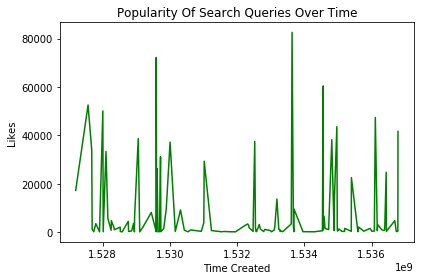

In [11]:
#Show the line graph for the popularity of search queries over time
plt.plot(mostliked_df["Time Created"], mostliked_df["Likes"], color='g')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Time Created')
plt.ylabel('Likes')
plt.title('Popularity Of Search Queries Over Time')
plt.tight_layout()
plt.show()